In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

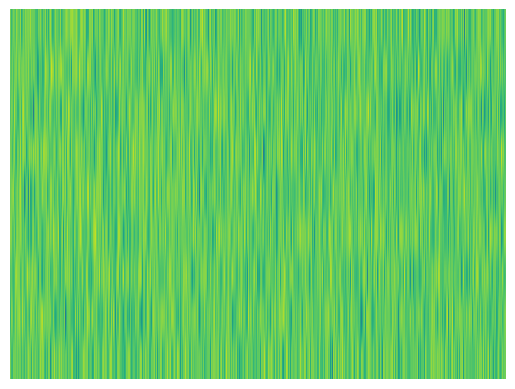

In [3]:
file = np.fromfile(open("jammed_channel"), dtype=np.complex64) ## empty channel case
samp_rate=41.44*10e6
fc=2.56*10e9
bandwidth=18.43*10e6
x=file[30000:40000]
fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [samp_rate/-2/1e6, samp_rate/2/1e6, 0, len(x)/samp_rate])
plt.axis("off")
plt.xlabel("Frequency")
plt.ylabel("Time")
plt.show()

In [2]:
tx_ch=np.fromfile(open("tx_channel"), dtype=np.complex64) 

KeyboardInterrupt: 

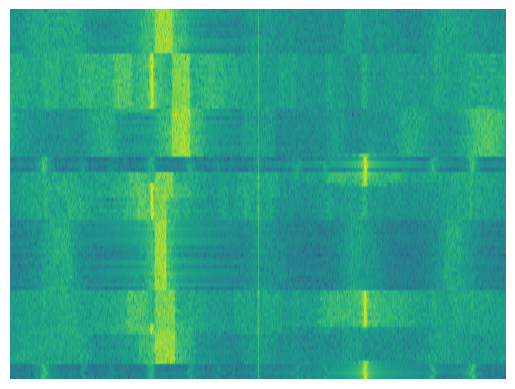

In [4]:
num_waterfall=4000
fft_size=1024
waterfall_size=100
samp_rate=41.44*10e6
index=0
for j in range(num_waterfall):
    x=tx_ch[index:index+(fft_size*waterfall_size)]
    spectrogram=np.zeros((waterfall_size, fft_size))
    for i in range(waterfall_size):
        spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)
    plt.imshow(spectrogram, aspect='auto', extent = [samp_rate/-2/1e6, samp_rate/2/1e6, 0, len(x)/samp_rate])
    plt.axis("off")
    plt.savefig("./data/wat_test/"+"0"+ str(j)+".png")
    index=index+(fft_size*waterfall_size)
    
